In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("HW_Dataset_1.csv")
print( 'Data set size: ', len( data ) )

Data set size:  78467


### Queston 1a.

In [3]:
# filters for north east and south region
NorthEastSouth = data.loc[data["REGION"] <= 2]
# drops -88 and -99 records in RECVDVACC
NorthEastSouth = NorthEastSouth.drop(NorthEastSouth[NorthEastSouth.RECVDVACC == -88].index)
NorthEastSouth = NorthEastSouth.drop(NorthEastSouth[NorthEastSouth.RECVDVACC == -99].index)

In [4]:
# filters for vaccinated persons in north east and south region
Vaccinated = sum(NorthEastSouth["RECVDVACC"] == 1)

In [7]:
# calculates vaccination rate
VaccinationRate = Vaccinated/len(NorthEastSouth)
VaccinationRate

0.8314007044161474

### Question 1b.

In [27]:
# filters for metro area and non metro area and removes -88 and -99 values
Metro = data.loc[data["EST_MSA"].notnull()]
Metro = Metro.drop(Metro[Metro.RECVDVACC == -88].index)
Metro = Metro.drop(Metro[Metro.RECVDVACC == -99].index)

NonMetro = data.loc[data["EST_MSA"].isnull()]
NonMetro = NonMetro.drop(NonMetro[NonMetro.RECVDVACC == -88].index)
NonMetro = NonMetro.drop(NonMetro[NonMetro.RECVDVACC == -99].index)

In [31]:
# calculates vaccination rate
MVaccinationRate = sum(Metro["RECVDVACC"] == 1)/len(Metro)
NMVaccinationRate = sum(NonMetro["RECVDVACC"] == 1)/len(NonMetro)
print('MVaccinationRate: ', MVaccinationRate, '\nNMVaccinationRate: ', NMVaccinationRate)

MVaccinationRate:  0.8634043369794665 
NMVaccinationRate:  0.8108727910427627


Vaccination rate in metro areas is higher than non-metro areas

### Question 1c.

In [37]:
# filters for north east and removes -88 and -99
NE = data.loc[data["REGION"]==1]
NE = NE.drop(NE[NE.RECVDVACC == -88].index)
NE = NE.drop(NE[NE.RECVDVACC == -99].index)

# counts old people
old = sum(NE["TBIRTH_YEAR"] <= 1972)
young = sum(NE["TBIRTH_YEAR"] > 1972)

OlderVaccination = sum((NE["TBIRTH_YEAR"] <= 1972) & (NE["RECVDVACC"] == 1))
YoungerVaccination = sum((NE["TBIRTH_YEAR"] > 1972) & (NE["RECVDVACC"] == 1))

In [38]:
# calculates vaccination rate
OlderVaccinationRate = OlderVaccination/old
YoungerVaccinationRate = YoungerVaccination/young
print('OlderVaccinationRate: ', OlderVaccinationRate, 'YoungerVaccination: ', YoungerVaccinationRate)

OlderVaccinationRate:  0.9227936507936508 YoungerVaccination:  0.7968514125512185


Older population has higher vaccination rate than younger population

### Question 1d.

In [39]:
# Subset df for north east and midwest regions
NE = data.loc[data["REGION"] == 1]
MidW = data.loc[data["REGION"] == 3]

# Removes -88 and -99 values
NE = NE.drop(NE[NE.INCOME == -88].index)
NE = NE.drop(NE[NE.INCOME == -99].index)
MidW = MidW.drop(MidW[MidW.INCOME == -88].index)
MidW = MidW.drop(MidW[MidW.INCOME == -99].index)

(array([ 787.,  669.,  860.,    0., 1457., 1292.,    0., 1769.,  950.,
        1257.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

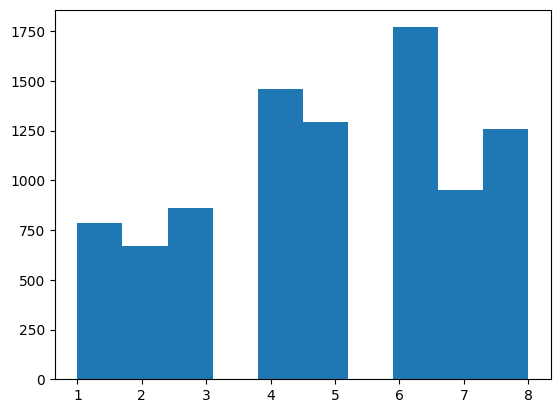

In [40]:
plt.hist(NE.INCOME)

(array([1205., 1020., 1421.,    0., 2197., 1843.,    0., 2286.,  955.,
         969.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

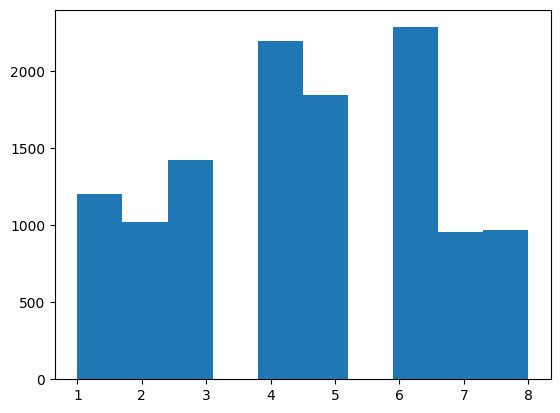

In [5]:
plt.hist(MidW.INCOME)

Income Distribution
1-3) 0 - 49,999   
4-5) 50,000 - 99,999   
6-8) 100,000 and above

In [41]:
print('Income 1-3: \nNE: ', sum(NE["INCOME"] <=3), '\nMidW: ', sum(MidW["INCOME"] <= 3), '\n\n')
print('Income 4-5: \nNE: ', sum((NE["INCOME"] >3) & (NE["INCOME"] < 6)), '\nMidW: ', sum((MidW["INCOME"] <= 3) & (MidW["INCOME"] < 6)), '\n\n')
print('Income 6-8: \nNE: ', sum(NE["INCOME"] > 6), '\nMidW: ', sum(MidW["INCOME"] > 6), '\n\n')
print('Income is more evenly distributed in NE region than MidW region\nMajority of MidW population earn less than $100,000')

Income 1-3: 
NE:  2316 
MidW:  3646 


Income 4-5: 
NE:  2749 
MidW:  3646 


Income 6-8: 
NE:  2207 
MidW:  1924 


Income is more evenly distributed in NE region than MidW region
Majority of MidW population earn less than $100,000


### Question 1e.

In [43]:
# removes -88 and -99
temp = data.drop(data[data.EXPNS_DIF == -99].index)
temp = data.drop(data[data.EXPNS_DIF == -88].index)

# Subset df for metro and non metro areas
Metro = temp.loc[temp["EST_MSA"].notnull()]
NonMetro = temp.loc[temp["EST_MSA"].isnull()]



In [44]:
# Counts no difficulties for metro and non metro areas
NoDiff_Metro = sum(Metro["EXPNS_DIF"] == 1)
NoDiff_NonMetro = sum(NonMetro["EXPNS_DIF"] == 1)

In [46]:
# Calculates no expense difficulites rate in metro and non metro ares
print('no difficulties rate (Metro): ', NoDiff_Metro/len(Metro))
print('no difficulties rate (NonMetro): ', NoDiff_NonMetro/len(NonMetro))

no difficulties rate (Metro):  0.6064874436574372
no difficulties rate (NonMetro):  0.6033221792534114


Residents of Metro Areas have slightly less hardship than NonMetro Areas, not significant